# Feature analysis

- How is my data distributed?
- Are there outliers in my data?
- Are there missing values?
- Do we need to scale the data?

In our digit recognition program we only have numerical data. This means we have to:
- Look at distribution (describe in pandas)
- Spot outliers using min/max
- Look at distribution with standard deviation, quartiles and box plot
- Find missing values
- Plot using scatter plots, histograms



In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

SIZE = 32

In [3]:
# IMPORTING OUR DATASET
data = pd.read_csv('../dataset-numpy/dataset.csv')
data.describe()

,area,contours,radius,circle_dist,rect_dist,hull_radius,aspect_ratio,centroid_x,centroid_y,angle,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,291.653385,44.952083,10.493405,0.725179,0.119105,13.664167,0.852753,15.859298,15.380416,50.857330,...,3.515104,31.285937,36.993750,6.548958,1.218229,37.840625,39.710417,6.739583,0.379688,4.532813
std,67.428881,8.744703,0.889372,0.263723,0.068749,0.814930,0.439098,1.193617,1.869070,65.489537,...,5.690358,19.265783,14.245519,6.925247,2.723832,14.236761,16.414749,9.965595,0.584767,2.868122
min,153.000000,20.000000,8.303587,0.225470,0.000000,11.549360,0.310345,11.835737,10.582800,-87.878899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.000000,39.000000,9.822737,0.581376,0.063434,13.067626,0.605262,15.077516,14.116460,65.718203,...,0.000000,15.000000,28.000000,0.000000,0.000000,31.000000,33.000000,0.000000,0.000000,2.000000
50%,275.500000,44.000000,10.369215,0.687549,0.116046,13.617666,0.655172,15.797984,15.295089,85.236358,...,0.000000,32.000000,38.000000,5.000000,0.000000,40.000000,44.000000,2.000000,0.000000,5.000000
75%,326.000000,51.000000,11.043633,0.795775,0.173021,14.191667,0.724138,16.571982,16.354908,90.000000,...,6.000000,48.000000,47.000000,11.000000,1.000000,47.000000,51.000000,10.000000,1.000000,7.000000
max,512.000000,88.000000,13.117590,3.119437,0.329466,16.446964,3.171172,20.410788,20.841542,90.000000,...,39.000000,64.000000,64.000000,31.000000,29.000000,64.000000,64.000000,55.000000,2.000000,9.000000


## Trying to find relation for every feature grouped by the label

In [4]:
data_by_label = data.groupby(['label'])
LABEL_SIZE = len(data_by_label)
data_by_label.mean()

,area,contours,radius,circle_dist,rect_dist,hull_radius,aspect_ratio,centroid_x,centroid_y,angle,...,weight_1_3,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes
label,,,,,,,,,,,,,,,,,,,,,
0,436.200565,34.977401,12.168335,0.672156,0.101296,12.983805,0.691432,15.598381,15.828897,82.820056,...,10.022599,9.169492,28.350282,22.344633,14.045198,0.824859,44.994350,45.502825,3.163842,0.932203
1,283.767677,36.313131,10.411477,0.962025,0.129142,13.647021,0.968201,15.967314,15.411210,38.609255,...,1.005051,2.292929,35.898990,44.272727,1.060606,0.227273,28.368687,48.348485,5.530303,0.000000
2,249.153846,47.071795,10.030531,0.694135,0.128543,14.820344,0.671576,15.173946,16.647531,81.104630,...,0.456410,0.343590,25.656410,22.569231,0.405128,2.861538,53.456410,52.430769,18.646154,0.005128
3,247.271357,52.195980,10.247545,0.787687,0.052183,14.257641,0.673131,16.822530,15.112528,82.190980,...,0.954774,0.085427,10.668342,42.462312,9.427136,1.879397,40.854271,45.281407,7.266332,0.000000
4,264.500000,54.349462,9.718960,0.421550,0.179503,12.896112,1.342215,15.672327,16.063245,-40.621097,...,12.365591,13.010753,45.940860,52.596774,6.822581,2.338710,20.220430,35.193548,0.586022,0.026882
5,242.818182,48.401070,10.023547,0.840482,0.079014,14.014906,1.015359,14.928513,14.208563,28.599580,...,0.449198,1.358289,17.245989,34.165775,3.994652,1.171123,40.438503,36.609626,1.866310,0.005348
6,298.943590,42.497436,10.977417,0.648495,0.166494,13.179918,0.600394,15.586234,18.863357,71.657192,...,0.061538,5.338462,54.923077,38.958974,11.697436,0.317949,37.979487,49.415385,19.569231,0.758974
7,250.062814,48.783920,9.765547,0.699069,0.157496,13.715756,0.924716,16.766939,13.385786,51.402566,...,8.271357,2.547739,41.140704,41.954774,5.758794,0.718593,39.341709,6.653266,0.000000,0.000000
8,360.491667,40.138889,10.758700,0.820820,0.075461,13.820539,0.840006,15.182823,15.285047,53.766461,...,2.916667,1.572222,45.461111,34.238889,2.083333,1.483333,43.966667,40.577778,3.555556,1.444444


In [5]:
# Create a different color for every label
colors = cm.rainbow(np.linspace(0, 1, len(data_by_label)))
# Make colors translucent
colors[:,-1] = .2

### Scatter Centroid per label

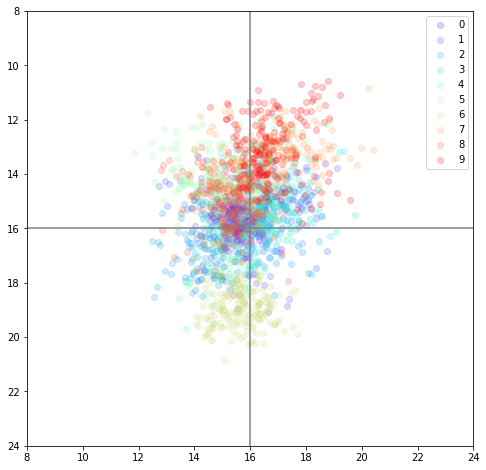

In [6]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
lim = [8, SIZE - 8]
ax.set(xlim=lim, ylim=lim)
# Invert y axis to 
ax.invert_yaxis()

# Plot centroids
for label_data, color in zip(data_by_label, colors):
    ax.scatter(label_data[1].centroid_x, label_data[1].centroid_y, label=str(label_data[0]), color=color)
# Draw center lines
ax.axvline(SIZE/2, color='gray')
ax.axhline(SIZE/2, color='gray')
ax.legend()
# fig.savefig('label_centroid_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Contours per label

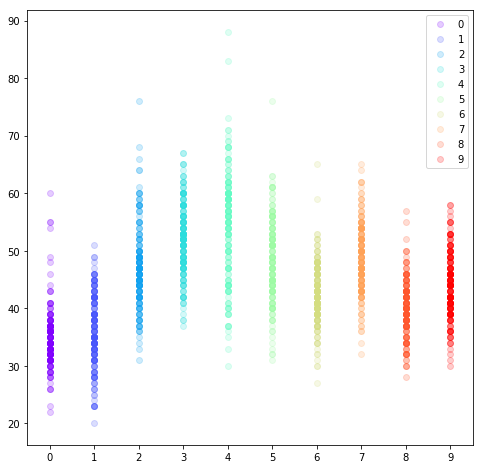

In [7]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot contours
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].contours))]
    ax.scatter(x_coords, label_data[1].contours, label=str(label_data[0]), color=color)
ax.legend()
# fig.savefig('label_contour_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Area per label

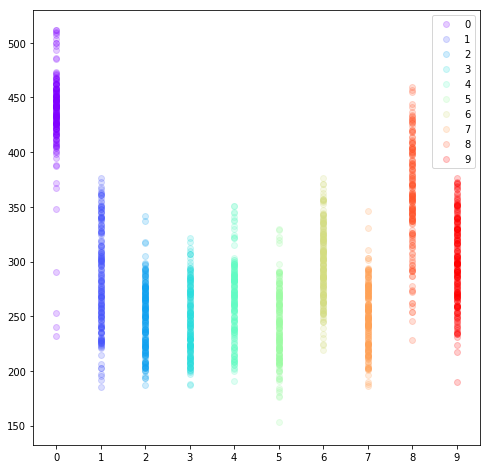

In [8]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].area))]
    ax.scatter(x_coords, label_data[1].area, label=str(label_data[0]), color=color)
ax.legend()
# fig.savefig('label_area_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Radius per label

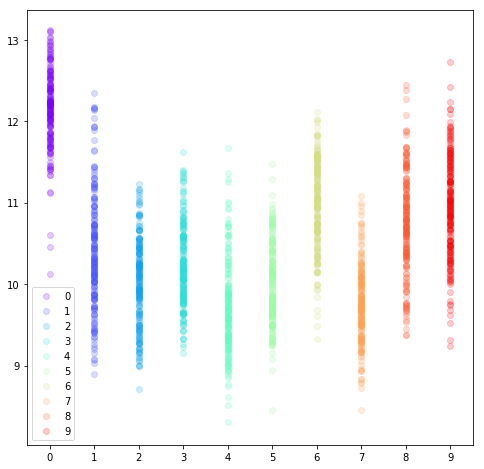

In [9]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].radius))]
    ax.scatter(x_coords, label_data[1].radius, label=str(label_data[0]), color=color)
ax.legend()
# fig.savefig('label_radius_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Circle Distance per label

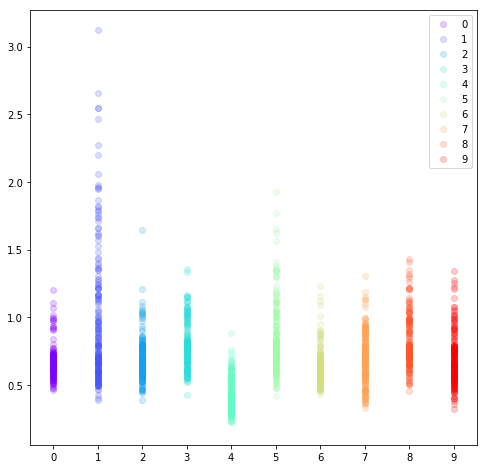

In [10]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].circle_dist))]
    ax.scatter(x_coords, label_data[1].circle_dist, label=str(label_data[0]), color=color)
ax.legend()
# fig.savefig('label_circ_dist_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Rectangle Distance per label

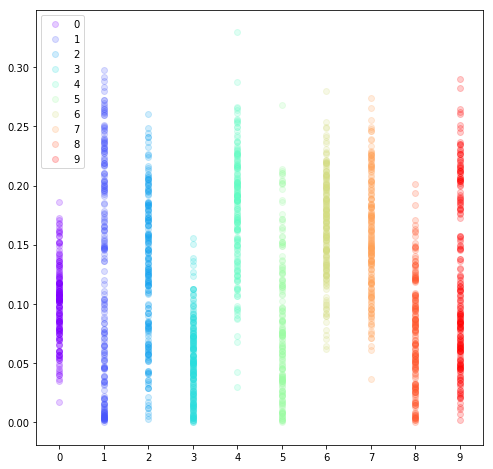

In [11]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].rect_dist))]
    ax.scatter(x_coords, label_data[1].rect_dist, label=str(label_data[0]), color=color)
ax.legend()
# fig.savefig('label_rect_dist_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Hull Radius per label

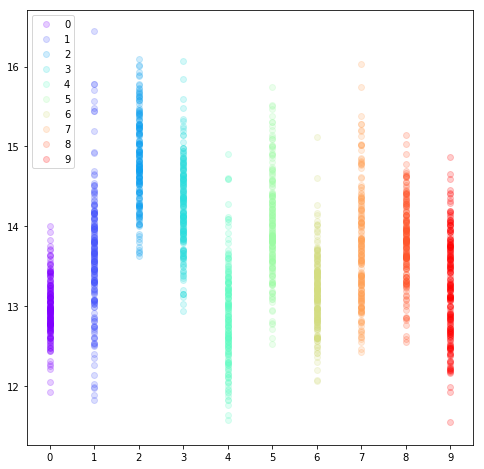

In [12]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].hull_radius))]
    ax.scatter(x_coords, label_data[1].hull_radius, label=str(label_data[0]), color=color)
ax.legend()
# fig.savefig('label_hull_radius_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Aspect Ratio per label

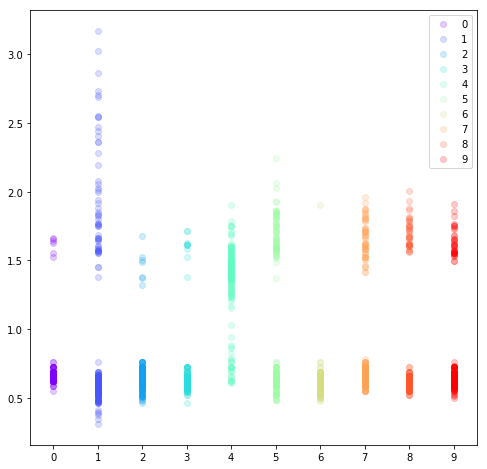

In [13]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].aspect_ratio))]
    ax.scatter(x_coords, label_data[1].aspect_ratio, label=str(label_data[0]), color=color)
ax.legend()
# fig.savefig('label_aspect_ratio_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Angle per label

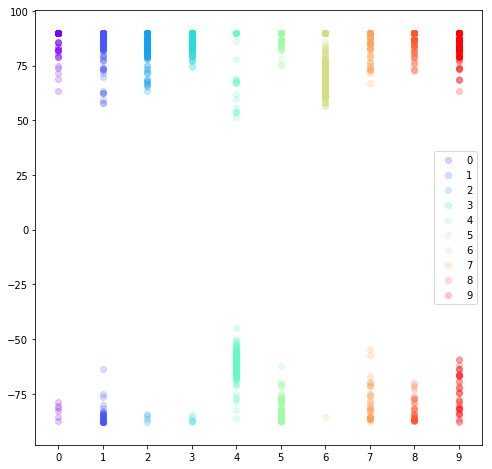

In [14]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].angle))]
    ax.scatter(x_coords, label_data[1].angle, label=str(label_data[0]), color=color)
ax.legend()
# fig.savefig('label_angle_scatter.png', dpi=200, bbox_inches='tight')

### Low res digit heatmap

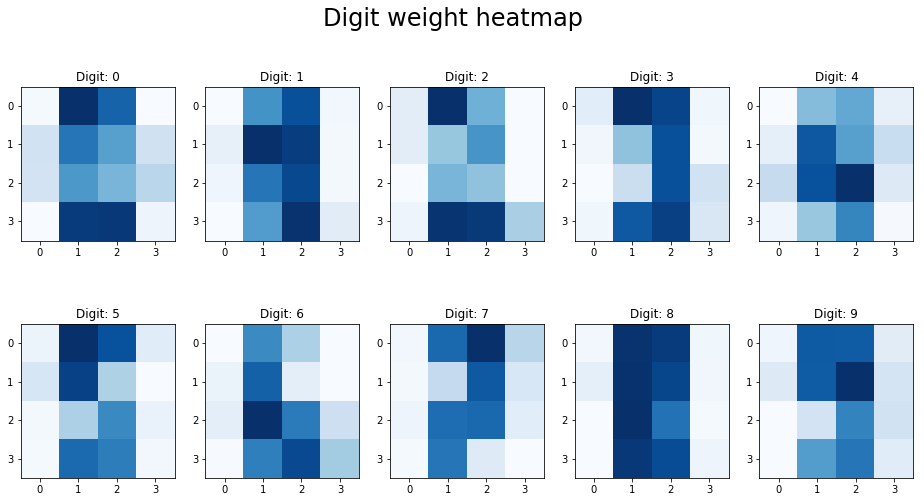

In [19]:
means = data_by_label.mean()
def mean_weight_matrix(label):
    m = np.zeros((4,4))
    for x in range(4):
        for y in range(4):
            m[x][y] = means['_'.join(['weight',str(x),str(y)])][label]
    return m

fig, axs = plt.subplots(2, int(LABEL_SIZE / 2), figsize=(16,8))
fig.suptitle('Digit weight heatmap', fontsize=24)
for i in range(LABEL_SIZE):
    sub_fig = axs[1 if i > (LABEL_SIZE / 2.0 - 1) else 0][int(i % (LABEL_SIZE / 2))]
    sub_fig.set_title('Digit: ' + str(i))
    sub_fig.imshow(mean_weight_matrix(i), cmap='Blues', interpolation='nearest')

# fig.savefig('label_weight_heatmaps.png', dpi=200, bbox_inches='tight')

### Num of Holes per label (scatter)

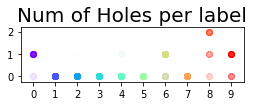

In [20]:
# Configure plot
fig, ax = plt.subplots(figsize=(4,1))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))
plt.yticks([0, 1, 2])
plt.title('Num of Holes per label', fontsize=20)

# Create a different color for every label
colors = cm.rainbow(np.linspace(0, 1, len(data_by_label)))
# Make colors translucent
colors[:,-1] = .006
# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].num_holes))]
    ax.scatter(x_coords, label_data[1].num_holes, label=str(label_data[0]), color=color)
# fig.savefig('label_holes_scatter.png', dpi=200, bbox_inches='tight')

### Num of Holes per label (box)

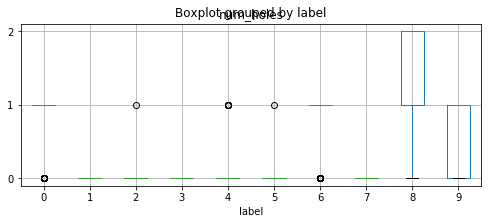

In [21]:
fig, ax = plt.subplots(figsize=(8,3))
plt.yticks([0, 1, 2])
plt.grid(which='major', axis='y')
plt.title('Num of Holes per label', fontsize=20)
ax = data.boxplot(column='num_holes', by='label', return_type='axes', ax=ax)
# fig.savefig('label_holes_box.png', dpi=200, bbox_inches='tight')

## Creating a Cleaner Dataset

Columns that are not distinctive enough:

- Circle Distance
- Rectangle Distance
- Aspect Ratio
- Angle

In [22]:
# Copy dataset and remove not distinctive columns
data_clean = data.copy()
del data_clean['circle_dist']
del data_clean['rect_dist']
del data_clean['aspect_ratio']
del data_clean['angle']

data_clean.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,291.653385,44.952083,10.493405,13.664167,15.859298,15.380416,2.320312,42.125000,38.457292,4.064063,...,3.515104,31.285937,36.993750,6.548958,1.218229,37.840625,39.710417,6.739583,0.379688,4.532813
std,67.428881,8.744703,0.889372,0.814930,1.193617,1.869070,3.623932,13.615466,15.544662,8.440119,...,5.690358,19.265783,14.245519,6.925247,2.723832,14.236761,16.414749,9.965595,0.584767,2.868122
min,153.000000,20.000000,8.303587,11.549360,11.835737,10.582800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.000000,39.000000,9.822737,13.067626,15.077516,14.116460,0.000000,36.000000,29.000000,0.000000,...,0.000000,15.000000,28.000000,0.000000,0.000000,31.000000,33.000000,0.000000,0.000000,2.000000
50%,275.500000,44.000000,10.369215,13.617666,15.797984,15.295089,0.000000,45.000000,40.000000,0.000000,...,0.000000,32.000000,38.000000,5.000000,0.000000,40.000000,44.000000,2.000000,0.000000,5.000000
75%,326.000000,51.000000,11.043633,14.191667,16.571982,16.354908,4.000000,52.000000,50.000000,4.000000,...,6.000000,48.000000,47.000000,11.000000,1.000000,47.000000,51.000000,10.000000,1.000000,7.000000
max,512.000000,88.000000,13.117590,16.446964,20.410788,20.841542,22.000000,64.000000,64.000000,62.000000,...,39.000000,64.000000,64.000000,31.000000,29.000000,64.000000,64.000000,55.000000,2.000000,9.000000


In [23]:
# Save dataset to .csv
#data_clean.to_csv('../dataset-numpy/dataset-clean-manual.csv', sep=',', encoding='utf-8')

In [41]:
data_clean.groupby(['label', 'num_holes']).size()

label  num_holes
0      0             12
       1            165
1      0            198
2      0            194
       1              1
3      0            199
4      0            181
       1              5
5      0            186
       1              1
6      0             47
       1            148
7      0            199
8      0             22
       1             56
       2            102
9      0             55
       1            149
dtype: int64